In [80]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z 
    def __str__(self):
        return "Point x = " + str(self.x) + ', y = ' + str(self.y) + ', z = ' + str(self.z)
        
    def multiply(self, multiplier):
        return Point(self.x * multiplier, self.y * multiplier, self.z * multiplier)
    
    def divide(self, divider):
        return Point(self.x / divider, self.y / divider, self.z / divider)
    
    def __add__(self, otherPoint):
        return Point(self.x + otherPoint.x, self.y + otherPoint.y, self.z + otherPoint.z)
    
    def __sub__(self, otherPoint):
        return Point(self.x - otherPoint.x, self.y - otherPoint.y, self.z - otherPoint.z)
        
class deCasteljau:
    def __init__(self, points):
        self.points = points
    
    def b(self,r,i,t):
        
        #print("r: ", r)
        #print("i: ", i)
        
        if r == 0:
            return self.points[i];
        
        return  self.b(r - 1, i, t).multiply(1 - t) +  self.b(r - 1, i + 1, t).multiply(t)
    
def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i 
    return fact

def binomial(n, i):
    if (i >= 0 and i <= n):
        return factorial(n)/(factorial(i) * factorial(n - i))
    else:
        return 0
    
class Berstein:

    def B(self, n, i, t):
        
        if (n == 0 and i == 0):
            return 1
        elif (i > n or i < 0):
            return 0
        
        return (1 - t) * self.B(n - 1, i, t) + t * self.B(n - 1, i - 1, t)






lengths of points: 10
index: 0
index: 2
index: 4
index: 6
10


<IPython.core.display.Javascript object>


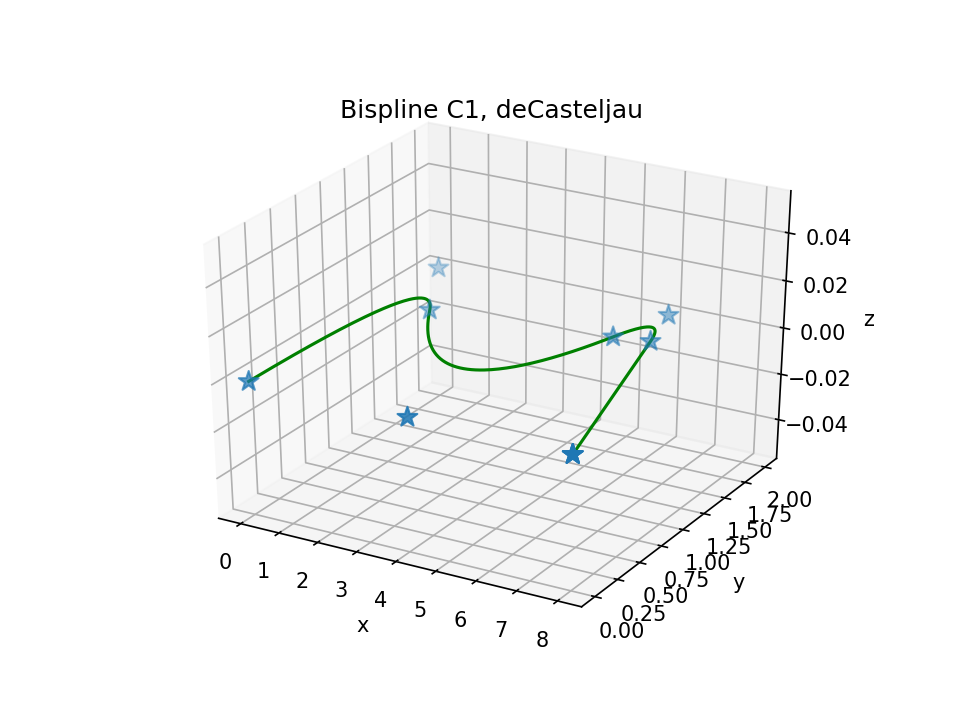

In [81]:
#C1 Quadratic B-spline Curves
#p102

import copy

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def junction_point(di, di_prev, prev_b2i, next_b2i):
    #print(di, di_prev, prev_b2i, next_b2i)
    jp = prev_b2i.multiply(di/(di_prev + di)) + next_b2i.multiply(di_prev / (di_prev + di))
    #print(jp)
    return jp
    
L = 5

points = [Point(0,0,0), 
          Point(0,2,0), 
          Point(4,0,0), 
          Point(6,2,0), 
          Point(8,0,0),
          Point(8,0,0)]
          
delta_i = [0.3,0.7,0.2,0.8,0.3]

for i in range(1,L,1):
    #print ("index: " + str(i))
    #print ("points len: " + str(len(points)))
    b2i = junction_point(delta_i[i], delta_i[i - 1], points[2 * i - 1], \
                         points[2 * i])
    points.insert(2 * i, b2i)

print("lengths of points: " + str(len(points)))

n = 8
r = 2
i = 0

xline = list()
yline = list()
zline = list()



for index in range(0,8,2):
    print ("index: " + str(index))
    
    dc = deCasteljau(points[index:index + 3])
    
    for i in np.arange(0.0, 1.01, 0.01):
        p = dc.b(2,0,i)

        xline.append(p.x)
        yline.append(p.y)
        zline.append(p.z)

                                   
xpoints = list()
ypoints = list()
zpoints = list()

print(len(points))
                                    
for px in points:
    xpoints.append(px.x)
    ypoints.append(px.y)
    zpoints.append(px.z)                               
                                    
                        
                                    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bispline C1, deCasteljau')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
                         
    

lengths of points: 10
10


<IPython.core.display.Javascript object>


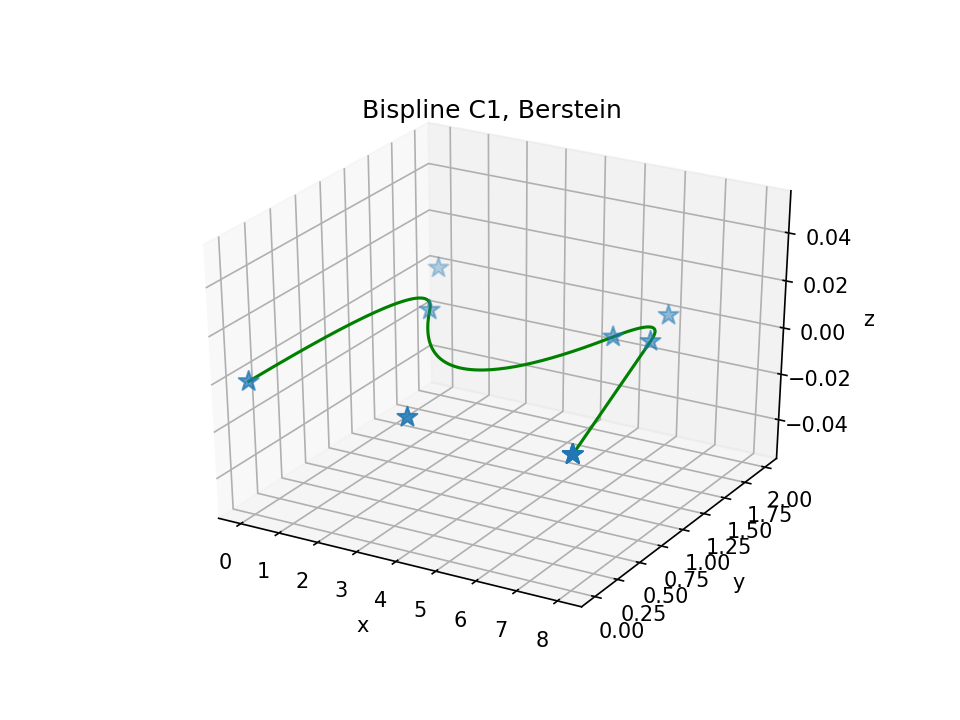

In [82]:
#C1 Quadratic B-spline Curves (Berstein)

import copy

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def junction_point(di, di_prev, prev_b2i, next_b2i):
    #print(di, di_prev, prev_b2i, next_b2i)
    jp = prev_b2i.multiply(di/(di_prev + di)) + next_b2i.multiply(di_prev / (di_prev + di))
    #print(jp)
    return jp
    
L = 5

points = [Point(0,0,0), 
          Point(0,2,0), 
          Point(4,0,0), 
          Point(6,2,0), 
          Point(8,0,0),
          Point(8,0,0)]
          
delta_i = [0.3,0.7,0.2,0.8,0.3]

for i in range(1,L,1):
    #print ("index: " + str(i))
    #print ("points len: " + str(len(points)))
    b2i = junction_point(delta_i[i], delta_i[i - 1], points[2 * i - 1], \
                         points[2 * i])
    points.insert(2 * i, b2i)

print("lengths of points: " + str(len(points)))

n = 8
r = 2
i = 0

xline = list()
yline = list()
zline = list()

b = Berstein()

for index in range(0,8,2):
    for t in np.arange(0, 1 ,0.01):
        bri = Point(0,0,0)
        for j in range(0,r + 1, 1):
            if i >= 0 and i <= (n - r):
                bri = bri + points[index + i + j].multiply(b.B(r,j,t))
    
        xline.append(bri.x)
        yline.append(bri.y)
        zline.append(bri.z)

                                   
xpoints = list()
ypoints = list()
zpoints = list()

print(len(points))
                                    
for px in points:
    xpoints.append(px.x)
    ypoints.append(px.y)
    zpoints.append(px.z)                               
                                    
                        
                                    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bispline C1, Berstein')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
                         
    

7


<IPython.core.display.Javascript object>


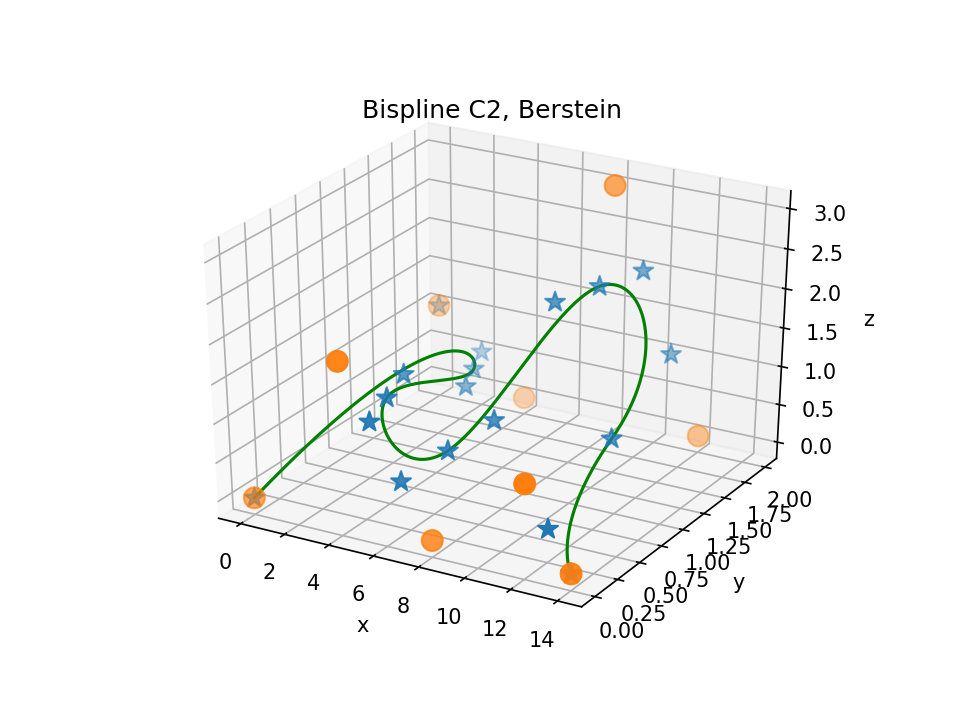

In [83]:
#7.6 C2 Cubic B-spline Curves
#page 107

import copy

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def b3i(delta_i, delta_i_prev, b3i_prev, b3i_next):
    
    b3ic = b3i_prev.multiply(delta_i / (delta_i_prev + delta_i)) + \
                b3i_next.multiply(delta_i_prev/(delta_i_prev + delta_i))
    return b3ic
    
def b3i_prev_2(delta_i, detla_i_prev, detla_i_prev2, delta, d_prev, d):
    b3i_2c = d_prev.multiply((detla_i_prev + delta_i) /  delta) + \
                d.multiply(detla_i_prev2/delta)
    return b3i_2c

def b3i_prev(delta_i, delta_i_prev, delta_i_prev2, delta, d_prev, d):
    b3ip = d_prev.multiply(delta_i/delta) + \
            d.multiply((delta_i_prev2 + delta_i_prev) / delta)
    return b3ip

def calc_delta(delta_i, detla_i_prev, detla_i_prev2):
    dlta = detla_i_prev2 + detla_i_prev + delta_i
    return dlta
    
d = [Point(0,0,0), 
          Point(0,2,1), 
          Point(4,2,0), 
          Point(4,0,2), 
          Point(8,0,0),
          Point(8,2,3),
          Point(12,2,0),
          Point(12,0,1),
          Point(14,0,0)]
          
delta_i = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]

L = 7
print(L)
#i = 2
dlt = calc_delta(delta_i[2], delta_i[1], delta_i[0])

b0 = d[0] #-1
b1 = d[1] # 0
b2 = d[1].multiply(delta_i[1] / (delta_i[0] + delta_i[1])) + \
                d[2].multiply(delta_i[0] / (delta_i[0] + delta_i[1]))
b3 = Point(0,0,0)

points = list()
points.append(b0)
points.append(b1)
points.append(b2)
points.append(b3)

for i in range(2, L - 1, 1):
    dlt = calc_delta(delta_i[i], delta_i[i - 1], delta_i[i - 2])
    b3prev2 = b3i_prev_2(delta_i[i], delta_i[i - 1], delta_i[i - 2], 
                         dlt, d[i], d[i + 1])
    b3prev1 = b3i_prev(delta_i[i], delta_i[i - 1], delta_i[i-2], dlt, d[i], d[i + 1])
    points.append(b3prev2)
    points.append(b3prev1)
    points.append(Point(0,0,0))
    
b3Lp2 = d[L].multiply(delta_i[L - 1]/(delta_i[L-2] + delta_i[L-1])) + \
            d[L + 1].multiply(delta_i[L - 2]/(delta_i[L-2] + delta_i[L-1]))
b3lp1 = d[L + 1]
b3L = d[L + 1]

points.append(b3Lp2)
points.append(b3lp1)
points.append(b3L)

for i in range(1, L - 1, 1):
    b3 = b3i(delta_i[i], delta_i[i - 1], points[3 * i - 1], points[3 * i + 1])
    points[3 * i] = b3


n = 4
r = 3
i = 0

xline = list()
yline = list()
zline = list()

b = Berstein()

for index in range(0,18,3):
    for t in np.arange(0, 1 ,0.01):
        bri = Point(0,0,0)
        for j in range(0,r + 1, 1):
            if i >= 0 and i <= (n - r):
                bri = bri + points[index + i + j].multiply(b.B(r,j,t))
    
        xline.append(bri.x)
        yline.append(bri.y)
        zline.append(bri.z)
                                   
xpoints = list()
ypoints = list()
zpoints = list()

count = 0
for px in points:
    #print("Point " + str(count))
    #print(px)
    xpoints.append(px.x)
    ypoints.append(px.y)
    zpoints.append(px.z) 
    count = count + 1
    
dxpoints = list()
dypoints = list()
dzpoints = list()

for px in d:
    dxpoints.append(px.x)
    dypoints.append(px.y)
    dzpoints.append(px.z) 
    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bispline C2, Berstein')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
ax.scatter(dxpoints, dypoints, dzpoints, marker='o',s=100)
                         
    

In [97]:
#7.7 Finding a knot sequence
#page 110

import math

def norm(d1, d2):
    v = d1 - d2
    
    mag = math.sqrt(v.x * v.x + v.y * v.y + v.z * v.z)
    
    return mag

d = [Point(0,0,0),     # -1   0
          Point(0,2,1),# 0  1
          Point(4,2,0),# 1  2
          Point(4,0,2),# 2  3
          Point(8,0,0),# 3  4 
          Point(8,2,3),# 4  5
          Point(12,2,0),# 5 6
          Point(12,0,1),# 6 7
          Point(14,0,0)]# 7 8

L = 7
u = list()

u.append(0)
u.append(norm(d[2], d[0]))

for i in range(2, L, 1):
    u.append(u[i - 1] + norm(d[i + 1], d[i]))
    
u.append(u[L - 1] + norm(d[L + 1],d[L - 1]))

count = 0

for i in u:
    
    print(str(count) + " " + str(i))
    count = count + 1


0 0
1 4.47213595499958
2 7.3005630797457695
3 11.772699034745349
4 15.378250310209339
5 20.37825031020934
6 22.61431828770913
7 25.44274541245532
